In [1]:
# library import
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d
import cv2

In [10]:
image  =  cv2.imread('open.jfif',cv2.IMREAD_GRAYSCALE)

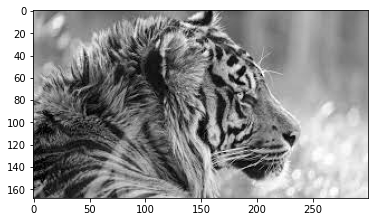

In [11]:
plt.imshow(image,cmap='gray')

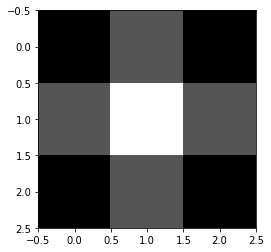

In [12]:
# smothing
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

#kernel filter
plt.imshow(gaussian, cmap='gray')

In [13]:
# smoothing filter 
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [28]:
gaussian_image = multi_convolver(image, gaussian, 3)

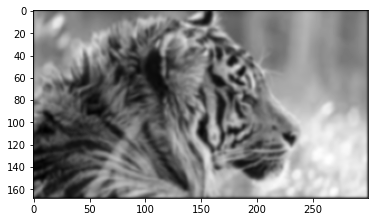

In [29]:
# gaussian image
plt.imshow(gaussian_image,cmap='gray')

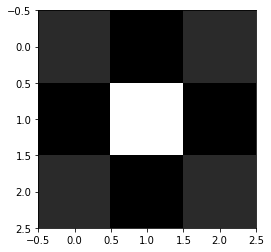

In [18]:
# Sharpen using 
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
#kernel filter
plt.imshow(sharpen, cmap='gray')

In [23]:
sharpen_image = multi_convolver(image, sharpen, 1)

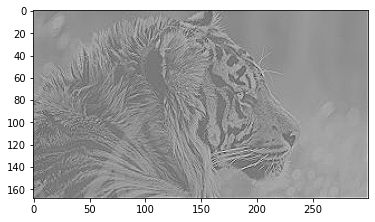

In [26]:
plt.imshow(sharpen_image, cmap='gray')

In [33]:
from scipy import ndimage

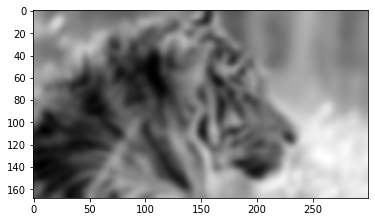

In [34]:
# low parse filtering using the gaussian filter
lowpass = ndimage.gaussian_filter(image, 3)
plt.imshow(lowpass,cmap='gray')

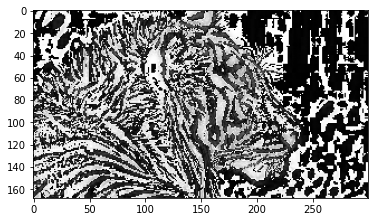

In [36]:
# high pass filtering using gaussian filter
gauss_highpass = image - lowpass
plt.imshow(gauss_highpass,cmap='gray')

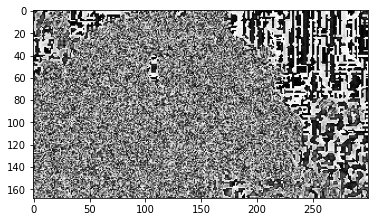

In [37]:
# normal high pass filtering 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])

highpass = ndimage.convolve(image, kernel)
plt.imshow(highpass,cmap='gray')